In [44]:
def parse_metrics(file_path):
    throughputs = []
    latencies = []
    with open(file_path, "r") as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            line = line.strip()
            if line.startswith("Throughput:"):
                # Extract throughput
                value = float(line.split(":")[1].split(" ")[1])
                # if value > 0:
                throughputs.append(value)
            elif line[0].isdigit():
                # print(line)
                latencies.append(float(line))
    throughputs = throughputs[-9:]
    throughputs = [x for x in throughputs if x > 0]
    return throughputs, latencies

[221042. 274042. 323750. 334791. 351583. 368458. 378917. 382500. 395208.
 403958.]
[0.00024673 0.00049346 0.00074019 0.00098692 0.00123365 0.00148038
 0.00172712 0.00197385 0.00222058 0.00246731]
[131792. 143667. 146708. 176625. 203042. 205667. 209541. 212917. 231042.
 250666.]
[0.00023535 0.0004707  0.00070605 0.0009414  0.00117675 0.0014121
 0.00164745 0.0018828  0.00211815 0.00235349]
[155417. 168125. 181416. 213958. 234959. 288875. 297750. 308584. 316958.
 317250.]
[0.00023669 0.00047337 0.00071006 0.00094675 0.00118343 0.00142012
 0.0016568  0.00189349 0.00213018 0.00236686]


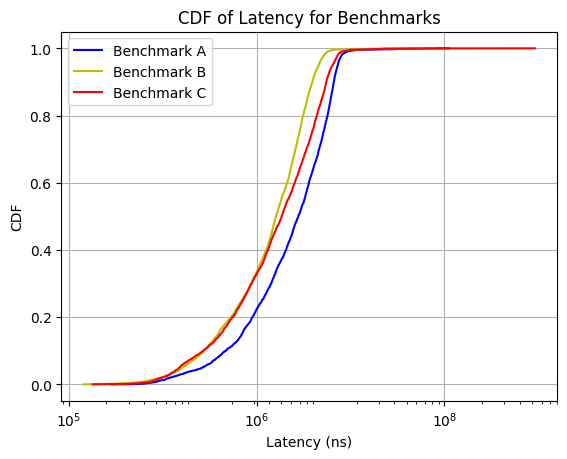

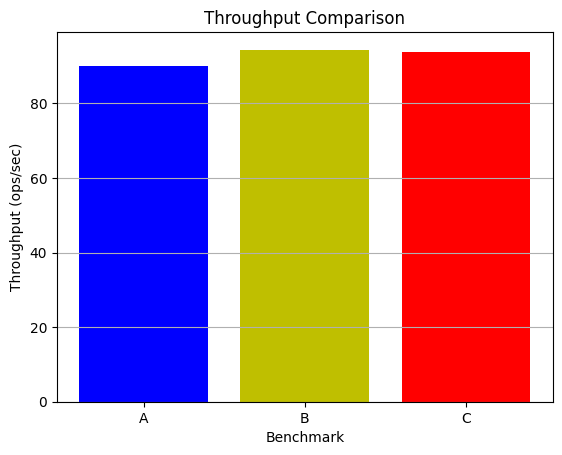

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cdf(data):
    # data = [np.log(x) for x in data]
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# Parse metrics for three benchmarks
benchmarks = ["A", "B", "C"]
throughput_data = {}
latency_data = {}
colors = {
    "A": "b",
    "B": "y",
    "C": "r"
}

for benchmark in benchmarks:
    file_path = f"metrics_log_{benchmark}4.txt"  # Example file naming
    throughputs, latencies = parse_metrics(file_path)
    throughput_data[benchmark] = throughputs
    latency_data[benchmark] = latencies

# Compute average throughputs
average_throughputs = {b: np.sum(throughput_data[b]) for b in benchmarks}

# Plot CDF for Latency
plt.figure()
for benchmark in benchmarks:
    latencies, cdf = compute_cdf(latency_data[benchmark])
    print(latencies[:10])
    print(cdf[:10])
    plt.plot(latencies, cdf, label=f"Benchmark {benchmark}", c=colors[benchmark])

plt.xlabel("Latency (ns)")
plt.ylabel("CDF")
plt.title("CDF of Latency for Benchmarks")
plt.legend()
plt.grid()
plt.xscale('log')
# Set x-axis ticks at 10^1, 10^2, ...
x_ticks = np.logspace(5, 8, num=3)  # 10^1 to 10^5
plt.xticks(x_ticks, [f"$10^{int(np.log10(tick))}$" for tick in x_ticks])  #
plt.show()

# Plot Bar Graph for Throughput
plt.figure()
avg_throughputs = [average_throughputs[b] for b in benchmarks]
plt.bar(benchmarks, avg_throughputs, color=["b", "y", "r"])
plt.xlabel("Benchmark")
plt.ylabel("Throughput (ops/sec)")
plt.title("Throughput Comparison")
plt.grid(axis="y")
plt.show()
